In [7]:
#installing the surprise package 
conda install -c conda-forge scikit-surprise


SyntaxError: invalid syntax (Temp/ipykernel_3060/130472770.py, line 2)

In [8]:
#importing all the reqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import surprise

In [20]:
df=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/DATA SCIENTIST/machine learning/Datasets/Amazon - Movies and TV Ratings.csv")

In [10]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(4848, 207)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

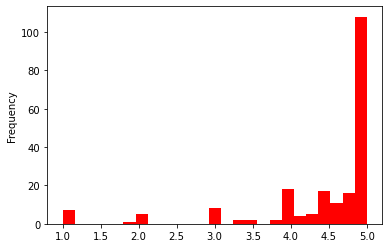

In [14]:
#PLOTTING THE MEAN FEQUENCY
df.describe().T['mean'].plot(bins=25,kind='hist',color="red")

<AxesSubplot:ylabel='Frequency'>

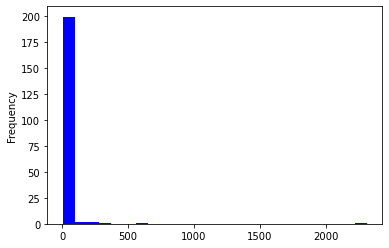

In [15]:
#PLOTTING THE COUNT FREQUENCY
df.describe().T['count'].plot(bins=25,kind='hist',color='blue')

In [16]:
#movie that has maximum view
df.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [17]:
#movie that has maximum rating
df.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [18]:
df=df.drop('user_id',axis=1)
df.head(2).T

,0,1
Movie1,5.0,NaN
Movie2,5.0,NaN
Movie3,NaN,2.0
Movie4,NaN,NaN
Movie5,NaN,NaN
...,...,...
Movie202,NaN,NaN
Movie203,NaN,NaN
Movie204,NaN,NaN
Movie205,NaN,NaN


In [21]:
#average rating of each movie
df.drop('user_id',axis=1).mean()

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [22]:
#top 5 movies with maximum rating
df.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()
#amz.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [23]:
#top 5 movie with least audience
df.describe().T['count'].sort_values(ascending=False)[0:5].to_frame()

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0


TASK: BUILDING RECOMMENDATION MODEL

In [24]:
#IMPORING ALL THE REQUIRED LIBRARIES FOR MODEL BUILDING
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [25]:
movie_data=df.melt(id_vars=df.columns[0],value_vars=df.columns[1:],var_name="Movies",value_name='Rating')
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [26]:
#CREATING A TRAINING AND TESTING DATASET
rd=Reader(rating_scale=(-1,10))
data=Dataset.load_from_df(movie_data.fillna(0),reader=rd)
data

In [27]:
train_data,test_data=train_test_split(data,test_size=0.20)

In [28]:
#using svd (singular value decomposition)
svd=SVD()
svd.fit(train_data)



In [29]:
pred=svd.test(test_data)

In [30]:
accuracy.rmse(pred)
accuracy.mae(pred)

RMSE: 0.2785
MAE:  0.0402


0.04021292784495925

In [32]:
u_id='AH3QC2PCIVTGP'
mv='movie206'
r_id=5.0
svd.predict(u_id,mv,r_ui=r_id,verbose=True)

user: AH3QC2PCIVTGP item: movie206   r_ui = 5.00   est = 0.02   {'was_impossible': False}


Prediction(uid='AH3QC2PCIVTGP', iid='movie206', r_ui=5.0, est=0.021981350522560863, details={'was_impossible': False})

In [33]:
from surprise.model_selection import cross_validate

In [35]:
cross_validate(svd,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2781  0.2828  0.2861  0.2823  0.0033  
MAE (testset)     0.0428  0.0431  0.0427  0.0429  0.0002  
Fit time          40.05   39.73   39.45   39.74   0.24    
Test time         3.66    3.05    3.17    3.29    0.27    


{'test_rmse': array([0.27806217, 0.2827963 , 0.28608287]),
 'test_mae': array([0.04279084, 0.0431418 , 0.04271067]),
 'fit_time': (40.04794239997864, 39.734779834747314, 39.45038461685181),
 'test_time': (3.66188383102417, 3.0469372272491455, 3.167623281478882)}

In [ ]:
def repeat(ml_type,dframe,min_,max_):
    rd=Reader()
    data=Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type,data,measures=['RMSE','MAE'],cv=3,verbose=True))
    print('@'*4)
    u_id='AH3QC2PCIVTGP'
    m_id='movie206'
    ra_u=5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print('@'*2)
    print()

In [ ]:
df=df.iloc[:3000,:50]
movie_data=df.melt(id_vars=df.columns[0],value_vars=df.columns[1:],var_name='Movies',value_name='Rating')


In [ ]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


In [36]:
#trying grid search to find optimum hyprparameter value for n factor
from surprise.model_selection import GridSearchCV

In [37]:
param_grid={'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [40]:
gs=GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)
gs.best_score
print(gs.best_score['rmse'])
print(gs.best_params)

0.28009588958005294
{'rmse': {'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}, 'mae': {'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}}
